In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle
%matplotlib inlin
def plot_thresholded(figures, num_rows, num_cols, labels = None):
    fig, axes = plt.subplots(nrows = num_rows, ncols= num_cols, figsize = (20, 20))
    axes = axes.ravel()
    for fignumber, heading in zip(range(len(figures)), figures):
        axes[fignumber].imshow(figures[heading], plt.gray())
        axes[fignumber].axis("off")
        if labels!=None:
            axes[fignumber].set_title(labels[fignumber])
        else:
            axes[fignumber].set_title(heading)
image = mpimg.imread("C:/Users/lenovo/Documents/SDCND/Advanced-Lane-Finding/Images/signs_vehicles_xygrad.jpg")  
image = mpimg.imread("C:/Users/lenovo/Documents/SDCND/Advanced-Lane-Finding/Images/color-shadow-example.jpg")
image = mpimg.imread("C:/Users/lenovo/Documents/SDCND/Advanced-Lane-Finding/Images/yellow_lanes.jpg")
def white_threshold_HSV(img, lower = [0, 0, 200], upper = [255, 30, 255]):
    img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    figures = {}
    labels = {}
    names = ["H", "S", "V"]
    for i in range(3):
        figures[i] = img_hsv[:, :, i]
        labels[i] = names[i]
    lower_white = np.array(lower, dtype = np.uint8)
    upper_white = np.array(upper, dtype = np.uint8)
    white_thresh = cv2.inRange(img_hsv, lower_white, upper_white)
    figures[3] = white_thresh
    labels[3] = "Thresh"
    plot_thresholded(figures, 1, 4, labels)
    return white_thresh
#white_threshold_HSV(image)
def white_threshold_HLS(img, lower = [0, 200, 200], upper = [255, 255, 255]):
    img_hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    figures = {}
    labels = {}
    names = ["H", "L", "S"]
    for i in range(3):
        figures[i] = img_hls[:, :, i]
        labels[i] = names[i]
    lower_white = np.array(lower, dtype = np.uint8)
    upper_white = np.array(upper, dtype = np.uint8)
    white_thresh = cv2.inRange(img_hls, lower_white, upper_white)
    figures[3] = white_thresh
    labels[3] = "White Thresh"
    plot_thresholded(figures, 1, 4, labels)
    return white_thresh
#whls = white_threshold_HLS(image)
# This function returns a binary image thresholded based on yellow HSV value range
def yellow_threshold_HSV(img, lower = [0, 80, 200], upper = [60, 255, 255]):
    img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    lower_yellow = np.array(lower, dtype = np.uint8)
    upper_yellow = np.array(upper, dtype = np.uint8)
    yellow_thresh = cv2.inRange(img_hsv, lower_yellow, upper_yellow)
    plt.title("Yellow thresholding in HSV")
    plt.imshow(yellow_thresh, cmap = "gray"), plt.show()
    return yellow_thresh

def yellow_threshold_LAB(img, thresh = (30, 150)):
    img_lab = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)
    figures = {}
    labels = {}
    names = ["L", "A", "B"]
    for i in range(3):
        figures[i] = img_lab[:, :, i]
        labels[i] = names[i]
    yellow_thresh = np.zeros_like(img_lab[:,:,0])
    yellow_thresh[(np.uint8(img_lab[:,:,2]) >= thresh[0]) & (np.uint8(img_lab[:,:,2]) <= thresh[1])] = 1
    figures[3] = yellow_thresh
    labels[3] = "Yellow Thresh"
    plot_thresholded(figures, 1, 4, labels)
    return yellow_thresh
#ylab = yellow_threshold_LAB(image)
def yellow_threshold_HLS(img, thresh = (80, 255)):
    img_hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    figures = {}
    labels = {}
    names = ["H", "L", "S"]
    for i in range(3):
        figures[i] = img_hls[:, :, i]
        labels[i] = names[i]
    yellow_thresh = np.zeros_like(img_hls[:,:,0])
    print(img_hls[:, :, 2])
    yellow_thresh[((img_hls[:,:,2]) >= thresh[0]) & ((img_hls[:,:,2]) <= thresh[1])] = 1
    figures[3] = yellow_thresh
    labels[3] = "Yellow Thresh"
    plot_thresholded(figures, 1, 4, labels)
    return yellow_thresh
yhls = yellow_threshold_HLS(image)


NameError: name 'mpimg' is not defined

In [10]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle
%matplotlib inline

# Read in an image and grayscale it
# This function will provide a binary image thresholded based on x or y gradient values
def abs_sobel_thresh(img, orient='x', sobel_kernel=3, thresh=(0, 255)):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    if orient == "x":
        sobel = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize = sobel_kernel)
    else:
        sobel = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize = sobel_kernel)
    abs_sobel = np.abs(sobel)
    sobel_scaled = np.uint8(255*abs_sobel/np.max(abs_sobel))
    grad_binary = np.zeros_like(sobel_scaled)
    grad_binary[(sobel_scaled >= thresh[0]) & (sobel_scaled <= thresh[1])] = 1
    plt.title("Sobel X Binary with Thresholds: {:.1f}, {:.1f}".format(thresh[0], thresh[1]))
    plt.imshow(grad_binary, cmap = "gray"), plt.show()
    return grad_binary
# This function will return a binary image thresholded based on magnitude of the gradient
def mag_thresh(image, sobel_kernel=3, mag_thresh=(0, 255)):
    # Calculate gradient magnitude
    # Apply threshold
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize = sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize = sobel_kernel)
    abs_sobelxy = np.sqrt(sobelx**2 + sobely**2)
    sobel_scaled = np.uint8(255*abs_sobelxy/np.max(abs_sobelxy))
    mag_binary = np.zeros_like(sobel_scaled)
    mag_binary[(sobel_scaled >= mag_thresh[0]) & (sobel_scaled <= mag_thresh[1])] = 1
    plt.title("Magnitude Thresholding"),plt.imshow(mag_binary, cmap = "gray"), plt.show()
    return mag_binary
# This function will return a binary image thresholded based on orientation of gradient
def dir_threshold(image, sobel_kernel=3, thresh=(0, np.pi/2)):
    # Calculate gradient direction
    # Apply threshold
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize = sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize = sobel_kernel)
    abs_sobelx = np.absolute(sobelx)
    abs_sobely = np.absolute(sobely)
    orient = np.arctan2(abs_sobely, abs_sobelx)
    dir_binary = np.zeros_like(orient)
    dir_binary[(orient >= thresh[0]) & (orient <= thresh[1])] = 1
    plt.title("Dir binary"), plt.imshow(dir_binary, cmap = "gray"), plt.show()
    return dir_binary
# This function returns a binary image thresholded based on white HSV value range
def white_threshold_HSV(img, lower = [0, 0, 200], upper = [255, 30, 255]):
    img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    figures = {}
    labels = {}
    names = ["H", "S", "V"]
    for i in range(3):
        figures[i] = img_hsv[:, :, i]
        labels[i] = names[i]
    lower_white = np.array(lower, dtype = np.uint8)
    upper_white = np.array(upper, dtype = np.uint8)
    white_thresh = cv2.inRange(img_hsv, lower_white, upper_white)
    figures[3] = white_thresh
    labels[3] = "Thresh"
    #plot_thresholded(figures, 1, 4, labels)
    return white_thresh


def yellow_threshold_HLS(img, lower = [0, 0, 80], upper = [40, 255, 255]):
    img_hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    lower_yellow = np.array(lower, dtype = np.uint8)
    upper_yellow = np.array(upper, dtype = np.uint8)
    yellow_thresh = cv2.inRange(img_hls, lower_yellow, upper_yellow)
    plt.title("Yellow thresholding in HLS")
    plt.imshow(yellow_thresh, cmap = "gray"), plt.show()
    return yellow_thresh


# Edit this function to create your own pipeline.
def pipeline(img, sx_thresh):
    sobelx_binary = abs_sobel_thresh(img, orient = "x", sobel_kernel = 15, thresh = (sx_thresh))
    sobely_binary = abs_sobel_thresh(img, orient = "y", sobel_kernel = 15, thresh = (20, 150))
    white_binary = white_threshold_HSV(img)
    yellow_binary_HLS = yellow_threshold_HLS(img)
    mag_binary = mag_thresh(img, sobel_kernel = 3, mag_thresh = (50, 150))
    dir_binary = dir_threshold(img, sobel_kernel = 3, thresh = (0.7, 1.3) )
    combined = np.zeros_like(yellow_binary_HLS)
    combined[(white_binary == 255) | ((yellow_binary_HLS == 255)) | ((sobelx_binary == 1) & (sobely_binary==1)) | ((mag_binary == 1) & (sobelx_binary==1)) | ((mag_binary==1) & (dir_binary == 1))] = 255
    plt.title("combined"), plt.imshow(combined, cmap = "gray"), plt.show()
    return combined
    



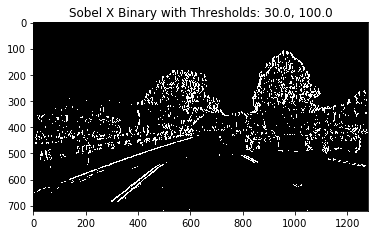

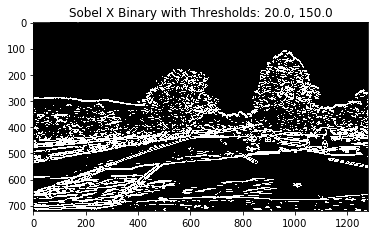

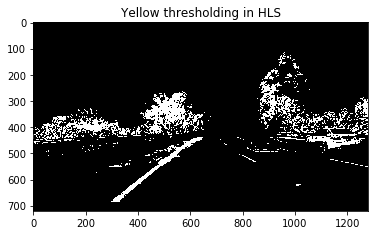

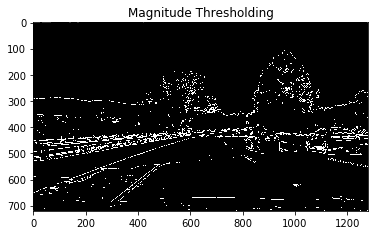

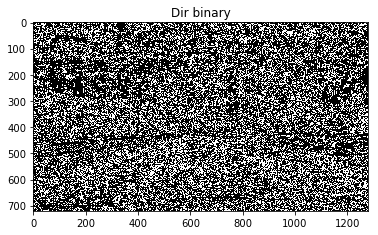

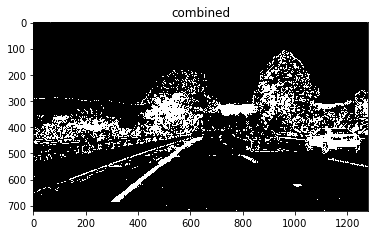

In [11]:
import glob
#image = mpimg.imread("C:/Users/lenovo/Documents/SDCND/Advanced-Lane-Finding/Images/color-shadow-example.jpg")
#image = mpimg.imread("C:/Users/lenovo/Documents/SDCND/Advanced-Lane-Finding/Images/signs_vehicles_xygrad.jpg")
#image = mpimg.imread("C:/Users/lenovo/Documents/SDCND/Advanced-Lane-Finding/Images/yellow_lanes.jpg")
#image = mpimg.imread("C:/Users/lenovo/Documents/SDCND/Advanced-Lane-Finding/Images/test_imagesyellow_lanes.jpg")
imagepaths = glob.glob("C:/Users/lenovo/Documents/SDCND/Advanced-Lane-Finding/Images/test_images/*.jpg")
for k, fname in enumerate(imagepaths[7:]):
    image = mpimg.imread(fname)
    
    result = pipeline(image, sx_thresh = (30, 100))
    break
    
    #f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
    #f.tight_layout()
    #ax1.imshow(image)
    #ax1.set_title('Original Image', fontsize=50)
    #ax2.imshow(result, cmap='gray')
    #ax2.set_title('Combine Thresholding', fontsize=50)
    #plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
    #extent = ax2.get_window_extent().transformed(f.dpi_scale_trans.inverted())
    #cv2.imwrite("C:/Users/lenovo/Documents/SDCND/Advanced-Lane-Finding/Images/thresholded_images" + fname[fname.rfind('\\'):], result)
    #plt.savefig("C:/Users/lenovo/Documents/SDCND/Advanced-Lane-Finding/Images/thresholded_images" + fname[fname.rfind('\\'):])